In [71]:
import pandas
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import math


path = os.getcwd() 

df = pandas.read_csv('/content/drive/MyDrive/MCI/data for armankade.csv', sep='\t')
df.head()

,line,text,average tag
0,1,با تشکر از شما آقای عباسی,POSITIVE
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE
4,5,@_zahra_str_75 بیخیار سالاد نمیشه,NATURAL


In [3]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1fcb37cdb4e6856e39ed06383ac362ad900c5155fe816e9b82d3f11a5dd2baeb
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [72]:
import emoji
import regex
import re

def clean_text(text):
    text=  emoji.demojize(text)
    text= re.sub(r'(:[!_\-\w]+:)', '', text)
    text= re.sub(r'@\w+', '', text)
    text =  text.replace("#", " ")
    return text

df['emoji'] = df['text'].apply(lambda x : emoji.distinct_emoji_list(x))
df['text'] = df['text'].apply(lambda x : clean_text(x))

df.loc[:12,:]


,line,text,average tag,emoji
0,1,با تشکر از شما آقای عباسی,POSITIVE,[]
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE,[]
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE,[]
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE,"[🌸, 🌼, 🌷]"
4,5,بیخیار سالاد نمیشه,NATURAL,[]
5,6,بعضی ها به خدا افاقه میکنند بعضی ها به کدخدا ب...,NATURAL,[]
6,7,عشششقم,POSITIVE,[😍]
7,8,عاشقه این اهنگمبی نظیره,POSITIVE,"[❤, 👌, 💪]"
8,9,على بابا باشين اوستى شهيدلره مدفندى/مسجدوه گلي...,BiMani,[]
9,10,مردی تو عمل پای حرف امام خمینی باش,NEGATIVE,[]


In [73]:
from hazm import sent_tokenize, word_tokenize
from hazm import Normalizer
from hazm import Stemmer, Lemmatizer
from hazm import stopwords_list

normalizer = Normalizer()
lemmatizer = Lemmatizer()

df['normalized_content'] = df['text']

df['normalized_content'] = df['normalized_content'].apply(lambda row:normalizer.normalize(row))


nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    lemmatized_list = []
    
    text = df.loc[row]['normalized_content']
    text_words = text.split(" ")

    for word in text_words:
        lemmatized_list.append(lemmatizer.lemmatize(word))
        
    lemmatized_text = " ".join(lemmatized_list)
    
    lemmatized_text_list.append(lemmatized_text)

df['normalized_content'] = lemmatized_text_list

In [ ]:
df.head()

,line,text,average tag,emoji,normalized_content
0,1,با تشکر از شما آقای عباسی,POSITIVE,[],با تشکر از شما آقا عباس
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE,[],برنامه خندوانه به زندگی ما انرژی داده مرسی
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE,[],مواظب کلید با تو برفا گم نشه، شب خونه راه نمید...
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE,"[🌷, 🌼, 🌸]",مایه افتخار ما شیراز هاست که آقا اومدن اونجا. ...
4,5,بیخیار سالاد نمیشه,NATURAL,[],بیخیار سالاد نمیشه


<AxesSubplot:xlabel='average tag'>

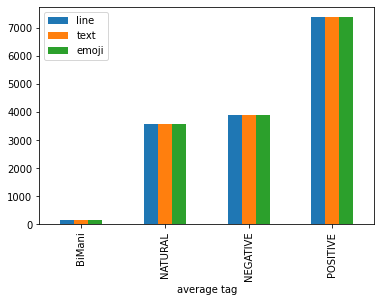

In [ ]:
import matplotlib.pyplot as plt

df_gb = df.groupby("average tag").agg('count')
df_gb.plot(kind = 'bar')


In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

df = df[~df['average tag'].isin(['BiMani','NATURAL']) ]
labels = df['average tag'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [27]:
(encoded_labels)

array([1, 1, 0, ..., 0, 0, 1])

In [75]:
texts = df['normalized_content'].values
train_sentences, test_sentences, train_labels, test_labels = train_test_split(texts,
                                                                              encoded_labels,
                                                                              test_size=0.2,
                                                                              stratify = encoded_labels)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

vec = CountVectorizer()
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names()
X = X.toarray()

word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    
    ''' each sentense has a vector as long as vocab '''
    for j in range(len(vocab)): 
        word_counts[l][vocab[j]] += X[i][j]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [79]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

In [80]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [81]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(word_tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [82]:
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

Accuracy of prediction on test set :  0.8589174800354925
